In [ ]:
#stick to arcpy and arcgis python api -  gettin an spatial join in arcpy - 
#github desktop - to interact with github 
#1)  Add Fields
# 1.1. City - text
# 1.2. County - text 
# 3. Type - text - single_family, multi_family 
# 4. Sub type - text - Apartment, Condo, Duplex, Mobile home, town home 
# 5. Unit Count - Short - numeric  Total Number of individual units within a particular property or development 
# 6. Acres - double - numeric - Convert sape area to acres 
# 7. DUA - double - numeric - Density in dwelling units per acre 
# 8. Total Acreage - double - numeric -

In [109]:
# Arc GIS API 
from arcgis.gis import GIS
try:
    # Connect to the GIS
    gis = GIS("https://www.arcgis.com", "intern_wfrc", "Minoo@1373") #you need esri license to work with - it plays nice with arcpy - thats the thing you can work with gdb 
    print("Successfully connected to ArcGIS Online")
    print(gis.properties)
except Exception as e:
    print(f"An error occurred: {e}")
import geopandas as gpd #open source 
! pip install geodatasets
! pip install geopandas shapely
import numpy as np

Successfully connected to ArcGIS Online
{
  "2DStylesGroupQuery": "title:\"Esri 2D Styles\" AND owner:esri_en",
  "3DBasemapGalleryGroupQuery": "title:\"ArcGIS Online 3D Basemaps\" AND owner:esri_en",
  "access": "public",
  "allSSL": true,
  "allowedRedirectUris": [],
  "analysisLayersGroupQuery": "title:\"Living Atlas Analysis Layers\" AND owner:esri",
  "authorizedCrossOriginDomains": [],
  "availableCredits": 8533.936,
  "backgroundImage": "images/arcgis_background.jpg",
  "basemapGalleryGroupQuery": "id:47eb7670904449b1bbfb3cd11245d7e7",
  "bingKey": "AhZ-mIzM6NtTXaJNCL3F04HDdRFcmeWrxVajVD996Gs389NfAizjYjrUdP_L3pW7",
  "canListApps": false,
  "canListConsultingServices": false,
  "canListData": false,
  "canListPreProvisionedItems": false,
  "canListSolutions": false,
  "canProvisionDirectPurchase": false,
  "canSearchPublic": true,
  "canSetCustomBuyLink": false,
  "canSetQuestionnaire": false,
  "canShareBingPublic": false,
  "canSharePublic": true,
  "canSignInArcGIS": true,
  

In [107]:
# Load the shapefile that you want to work on 
TxPTooele = gpd.read_file('C:/Users/Minoo/Documents/Internship/TaxParcelExploration/Work/TaxPaarcelTooele/parcels_Tooele_LIR.shp')

In [106]:
#ADD FIELDS 
# Add text fields City (str)
TxPTooele ['City'] = 'default_text'
# Add text fields County (str)
TxPTooele ['County'] = 'default_text'
# Add text fields Type (str)
TxPTooele ['Type'] = 'default_text'
# Add text fields SubType (str)
TxPTooele ['SubType'] = 'default_text'
# Add double (float) field - Unit Count - numeric 
TxPTooele['UnitCount'] = 0.0
# Add double (float) field - Acres - numeric 
TxPTooele['UnitCount'] = 0.0
# Add double (float) field - DUA(DensityUnitsPerAcre) - numeric 
TxPTooele['DUA'] = 0.0
# Add double (float) field - TotalAcreage - numeric 
TxPTooele['TotalAcrge'] = 0.0

In [117]:
TxPTooele['Shape_Area'] = TxPTooele['Shape_Area'].astype(np.float64).round(0)
TxPTooele['Shape_Area']

0        2853980.0
1        4557918.0
2        2252332.0
3        1436341.0
4        2242912.0
           ...    
34264      55727.0
34265      71081.0
34266    1079384.0
34267       1793.0
34268       6777.0
Name: Shape_Area, Length: 34269, dtype: float64

In [87]:
TxPTooele.columns

Index(['COUNTY_NAM', 'COUNTY_ID', 'ASSESSOR_S', 'BOUNDARY_S', 'DISCLAIMER',
       'CURRENT_AS', 'PARCEL_ID', 'PARCEL_ADD', 'PARCEL_CIT', 'TAXEXEMPT_',
       'TAX_DISTRI', 'TOTAL_MKT_', 'LAND_MKT_V', 'PARCEL_ACR', 'PROP_CLASS',
       'PRIMARY_RE', 'HOUSE_CNT', 'SUBDIV_NAM', 'BLDG_SQFT', 'FLOORS_CNT',
       'FLOORS_INF', 'BUILT_YR', 'EFFBUILT_Y', 'CONST_MATE', 'Shape_Leng',
       'Shape_Area', 'geometry', 'City', 'County', 'Type', 'SubType',
       'UnitCount', 'DUA', 'TotalAcrge'],
      dtype='object')

In [111]:
TxPTooele.dtypes

COUNTY_NAM            object
COUNTY_ID             object
ASSESSOR_S            object
BOUNDARY_S            object
DISCLAIMER            object
CURRENT_AS    datetime64[ms]
PARCEL_ID             object
PARCEL_ADD            object
PARCEL_CIT            object
TAXEXEMPT_            object
TAX_DISTRI            object
TOTAL_MKT_           float64
LAND_MKT_V           float64
PARCEL_ACR           float64
PROP_CLASS            object
PRIMARY_RE            object
HOUSE_CNT             object
SUBDIV_NAM            object
BLDG_SQFT            float64
FLOORS_CNT           float64
FLOORS_INF            object
BUILT_YR               int32
EFFBUILT_Y             int32
CONST_MATE            object
Shape_Leng           float64
Shape_Area           float64
geometry            geometry
dtype: object

In [119]:
#Save the updated shapefile
TxPTooele.to_file('C:/Users/Minoo/Documents/Internship/TaxParcelExploration/Work/TaxPaarcelTooele/parcels_Tooele_LIRUpdate.shp')

c:\Users\Minoo\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Field CURRENT_AS create as date field, though DateTime requested.
  ogr_write(
c:\Users\Minoo\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Value 124316600 of field TOTAL_MKT_ of feature 3281 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\Minoo\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Value 136426135 of field Shape_Area of feature 4297 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\Minoo\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Value 176884540 of field Shape_Area of feature 4599 not successfully written. Possibly due to too larger number with respect to field width

In [121]:
# updated shapefile 
updated_TxPTooele = gpd.read_file('C:/Users/Minoo/Documents/Internship/TaxParcelExploration/Work/TaxPaarcelTooele/parcels_Tooele_LIRUpdate.shp')
print(updated_TxPTooele.head())
updated_TxPTooele.columns

      COUNTY_NAM COUNTY_ID                                         ASSESSOR_S  \
0  Tooele County        23  https://tooeleco.org/government/elected-offici...   
1  Tooele County        23  https://tooeleco.org/government/elected-offici...   
2  Tooele County        23  https://tooeleco.org/government/elected-offici...   
3  Tooele County        23  https://tooeleco.org/government/elected-offici...   
4  Tooele County        23  https://tooeleco.org/government/elected-offici...   

                                          BOUNDARY_S  \
0  https://tooeleco.org/government/elected-offici...   
1  https://tooeleco.org/government/elected-offici...   
2  https://tooeleco.org/government/elected-offici...   
3  https://tooeleco.org/government/elected-offici...   
4  https://tooeleco.org/government/elected-offici...   

                            DISCLAIMER CURRENT_AS   PARCEL_ID PARCEL_ADD  \
0  http://www.utah.gov/disclaimer.html 2023-09-21  0402700001       None   
1  http://www.utah.gov/d

Index(['COUNTY_NAM', 'COUNTY_ID', 'ASSESSOR_S', 'BOUNDARY_S', 'DISCLAIMER',
       'CURRENT_AS', 'PARCEL_ID', 'PARCEL_ADD', 'PARCEL_CIT', 'TAXEXEMPT_',
       'TAX_DISTRI', 'TOTAL_MKT_', 'LAND_MKT_V', 'PARCEL_ACR', 'PROP_CLASS',
       'PRIMARY_RE', 'HOUSE_CNT', 'SUBDIV_NAM', 'BLDG_SQFT', 'FLOORS_CNT',
       'FLOORS_INF', 'BUILT_YR', 'EFFBUILT_Y', 'CONST_MATE', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [122]:
# number of rows 
num_rows, num_columns = updated_TxPTooele.shape
# Print the number of rows
print(f"Number of rows: {num_rows}")

Number of rows: 34269


In [55]:
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
import geodatasets
# spatial join for city and county 
# Load the two GeoDataFrames
gdfmunicipality = gpd.read_file('C:/Users/Minoo/Documents/Internship/TaxParcelExploration/Work/TaxPaarcelTooele/Municipalities.shp')
gdfTooeleParcels = gpd.read_file('C:/Users/Minoo/Documents/Internship/TaxParcelExploration/Work/TaxPaarcelTooele/parcels_Tooele_LIRUpdate.shp')
gdfCounties = gpd.read_file('C:/Users/Minoo/Documents/Internship/TaxParcelExploration/Work/TaxPaarcelTooele/Utah_County_Boundaries.shp')



<AxesSubplot: >

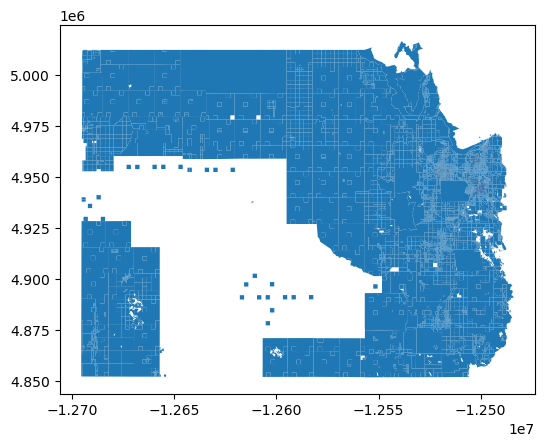

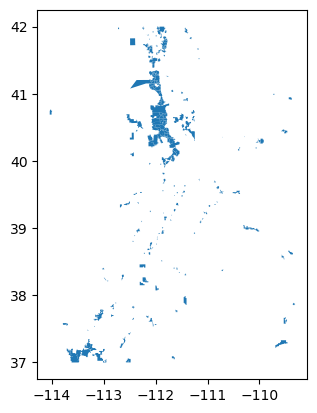

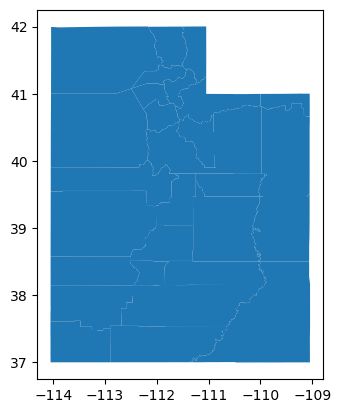

In [56]:
gdfTooeleParcels.plot()
gdfmunicipality.plot()
gdfCounties.plot()

Empty GeoDataFrame
Columns: [COUNTY_NAM, COUNTY_ID, ASSESSOR_S, BOUNDARY_S, DISCLAIMER, CURRENT_AS, PARCEL_ID, PARCEL_ADD, PARCEL_CIT, TAXEXEMPT_, TAX_DISTRI, TOTAL_MKT_, LAND_MKT_V, PARCEL_ACR, PROP_CLASS, PRIMARY_RE, HOUSE_CNT, SUBDIV_NAM, BLDG_SQFT, FLOORS_CNT, FLOORS_INF, BUILT_YR, EFFBUILT_Y, CONST_MATE, Shape_Leng, Shape_Area, City, County, Type, SubType, Unit Count, UnitCount, DUA, TotalAcrea, geometry, index_right, OBJECTID, COUNTYNBR, NAME, COUNTYSEAT, SHORTDESC, UPDATED, FIPS, ENTITYNBR, SALESTAXID, IMSCOLOR, MINNAME, POPLASTCEN, POPLASTEST, UGRCODE, GNIS, GlobalID, SHAPE_Leng, SHAPE_Area]
Index: []

[0 rows x 54 columns]


C:\Users\Minoo\AppData\Local\Temp\ipykernel_129148\3845662160.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326

  SjMunicipality = gpd.sjoin(updated_TxPTooele,gdfmunicipality, how="inner", predicate='intersects')
C:\Users\Minoo\AppData\Local\Temp\ipykernel_129148\3845662160.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  SjMunicipality.plot()


<AxesSubplot: >

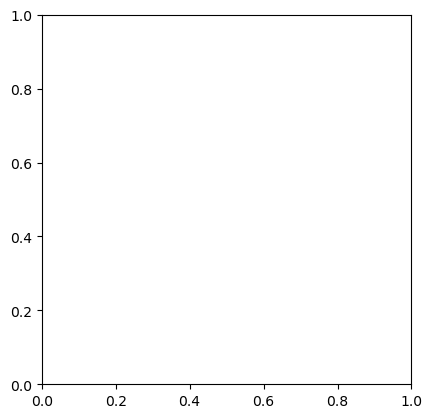

In [53]:
# Perform the spatial join - municipalities and tax parcels
SjMunicipality = gpd.sjoin(updated_TxPTooele,gdfmunicipality, how="inner", predicate='intersects')
output_file = 'C:/Users/Minoo/Documents/Internship/TaxParcelExploration/Work/TaxPaarcelTooele/SjMunicipality.shp'  
# Display the first few rows of the resulting GeoDataFrame
print(SjMunicipality.head())
SjMunicipality.plot()

Empty GeoDataFrame
Columns: [COUNTY_NAM, COUNTY_ID, ASSESSOR_S, BOUNDARY_S, DISCLAIMER, CURRENT_AS, PARCEL_ID, PARCEL_ADD, PARCEL_CIT, TAXEXEMPT_, TAX_DISTRI, TOTAL_MKT_, LAND_MKT_V, PARCEL_ACR, PROP_CLASS, PRIMARY_RE, HOUSE_CNT, SUBDIV_NAM, BLDG_SQFT, FLOORS_CNT, FLOORS_INF, BUILT_YR, EFFBUILT_Y, CONST_MATE, Shape_Leng, Shape_Area, City, County, Type, SubType, Unit Count, UnitCount, DUA, TotalAcrea, geometry, index_right, OBJECTID, COUNTYNBR, ENTITYNBR, ENTITYYR, NAME, FIPS, STATEPLANE, POP_LASTCE, POP_CURRES, GlobalID, FIPS_STR, COLOR4, Shape__Are, Shape__Len]
Index: []

[0 rows x 50 columns]


C:\Users\Minoo\AppData\Local\Temp\ipykernel_129148\2674731200.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326

  SjCounties = gpd.sjoin(updated_TxPTooele,gdfCounties, how="inner", predicate='intersects')
C:\Users\Minoo\AppData\Local\Temp\ipykernel_129148\2674731200.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  SjCounties.plot()


<AxesSubplot: >

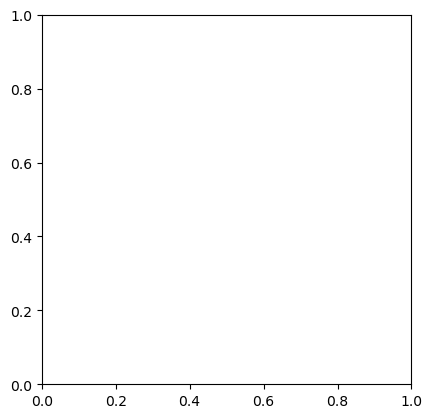

In [57]:
# Perform the spatial join - counties and tax parcels
SjCounties = gpd.sjoin(updated_TxPTooele,gdfCounties, how="inner", predicate='intersects')
output_file = 'C:/Users/Minoo/Documents/Internship/TaxParcelExploration/Work/TaxPaarcelTooele/SjCounties.shp'  
# Display the first few rows of the resulting GeoDataFrame
print(SjCounties.head())
SjCounties.plot()

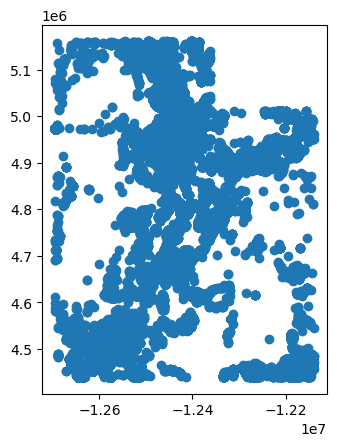

In [63]:
# type of homes = single_family / multi_family 
# add the address points 
# spatial join with the tax parcel layer
# select join count = 1 and mark them as single family
# select join count = 2 and more and mark them as multi family 

# Load the shapefile that you want to work on 
AddressPoint = gpd.read_file('C:/Users/Minoo/Documents/Internship/TaxParcelExploration/Work/TaxPaarcelTooele/AddressPoints.shp')
AddressPoint.plot()


In [70]:
print(AddressPoint.head())
print(updated_TxPTooele.head())

   AddSystem                                  UTAddPtID  \
0  ROOSEVELT  ROOSEVELT | 11861 N UINTAH CANYON HIGHWAY   
1  ROOSEVELT  ROOSEVELT | 11766 N UINTAH CANYON HIGHWAY   
2  ROOSEVELT                   ROOSEVELT | 828 W 9000 N   
3  ROOSEVELT                   ROOSEVELT | 612 W 9000 N   
4  ROOSEVELT  ROOSEVELT | 11708 N UINTAH CANYON HIGHWAY   

                         FullAdd AddNum AddNumSuff PrefixDir     StreetName  \
0  11861 N UINTAH CANYON HIGHWAY  11861       None         N  UINTAH CANYON   
1  11766 N UINTAH CANYON HIGHWAY  11766       None         N  UINTAH CANYON   
2                   828 W 9000 N    828       None         W           9000   
3                   612 W 9000 N    612       None         W           9000   
4  11708 N UINTAH CANYON HIGHWAY  11708       None         N  UINTAH CANYON   

  StreetType SuffixDir LandmarkNa  ... CountyID State PtLocation PtType  \
0        HWY      None       None  ...    49013    UT       None   None   
1        HWY      No

In [68]:
# Perform the spatial join - address points - tax parcels 
SjAddressPoint = gpd.sjoin(updated_TxPTooele,AddressPoint, how="inner", predicate='intersects')
output_file1 = 'C:/Users/Minoo/Documents/Internship/TaxParcelExploration/Work/TaxPaarcelTooele/SjAddressPoint.shp'  
print(SjAddressPoint.head())


        COUNTY_NAM COUNTY_ID  \
18   Tooele County        23   
41   Tooele County        23   
52   Tooele County        23   
108  Tooele County        23   
151  Tooele County        23   

                                            ASSESSOR_S  \
18   https://tooeleco.org/government/elected-offici...   
41   https://tooeleco.org/government/elected-offici...   
52   https://tooeleco.org/government/elected-offici...   
108  https://tooeleco.org/government/elected-offici...   
151  https://tooeleco.org/government/elected-offici...   

                                            BOUNDARY_S  \
18   https://tooeleco.org/government/elected-offici...   
41   https://tooeleco.org/government/elected-offici...   
52   https://tooeleco.org/government/elected-offici...   
108  https://tooeleco.org/government/elected-offici...   
151  https://tooeleco.org/government/elected-offici...   

                              DISCLAIMER CURRENT_AS   PARCEL_ID  \
18   http://www.utah.gov/disclaimer.html 2

In [ ]:
# sub type = apartment/condo/duplex/mobilehome/townhome 


In [ ]:
# unit count
# field calculate the join count from the spatial join with the address points 

In [ ]:
# acres 
#field calculate shape area into the column
#calculate geometry - acres 

In [ ]:
# DUA - Density of dwelling units per acre
# unit counts / acres 

In [ ]:
#Total acreage 